This assignment provides an opportunity to build an ANN model using the a bank marketing dataset

https://www.kaggle.com/sriharipramod/bank-loan-classification

Target variable - personal loan - reflects whether a customer accepted a personal loan offer.

Load the data and perform EDA.

1. Evaluate missing values.
2. Assess target class distribution.
3. Pre-process data as needed.
4. Assess information value of individual features (correlation analysis and pairlot).

5 pts.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns


In [2]:
bank= pd.read_csv('/content/archive (4).zip')

In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


<Axes: >

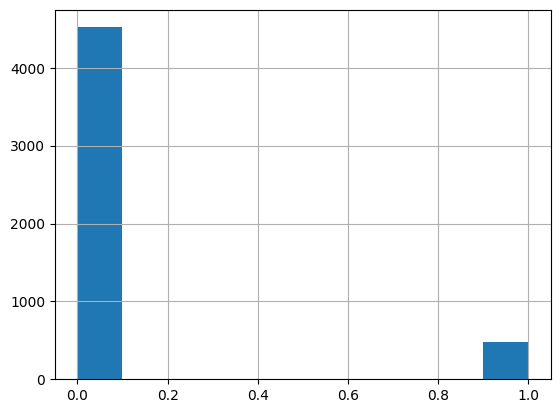

In [4]:
bank['Personal Loan'].hist()

In [5]:
bank.corr()['Personal Loan'].sort_values(ascending=False)

Personal Loan         1.000000
Income                0.502462
CCAvg                 0.366889
CD Account            0.316355
Mortgage              0.142095
Education             0.136722
Family                0.061367
Securities Account    0.021954
Online                0.006278
CreditCard            0.002802
ZIP Code              0.000107
Experience           -0.007413
Age                  -0.007726
ID                   -0.024801
Name: Personal Loan, dtype: float64

In [6]:
bank.drop(columns=['ID'], inplace=True)

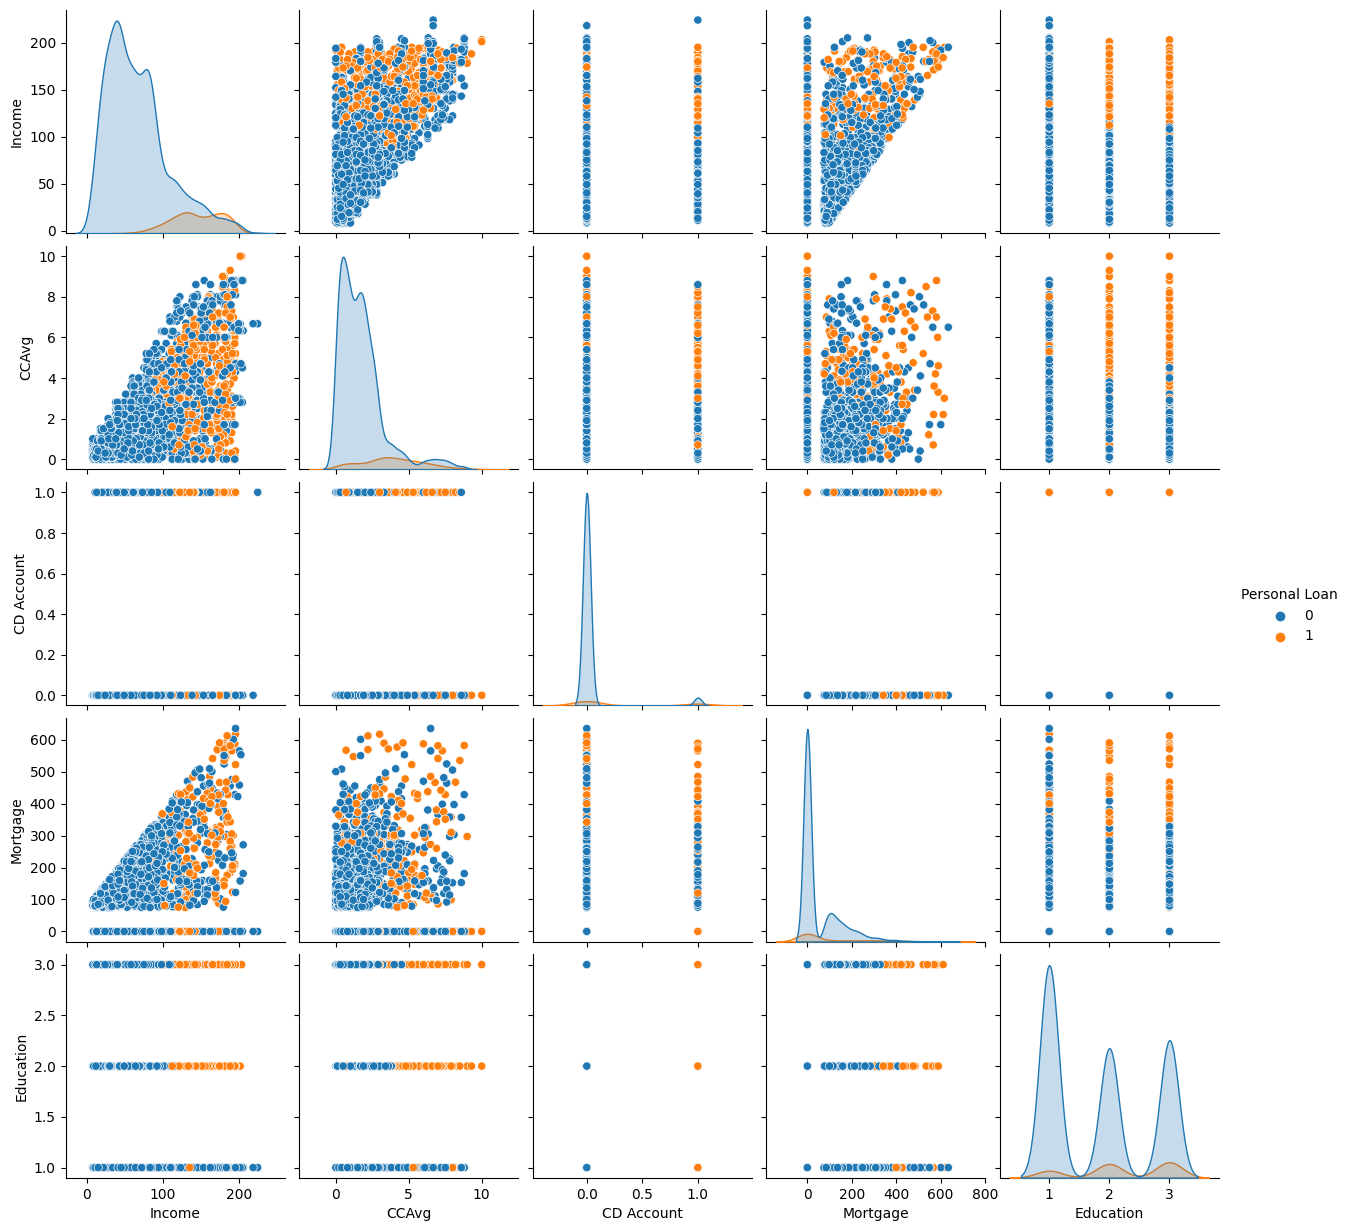

In [ ]:
sns.pairplot(bank[['Income','CCAvg', 'CD Account','Mortgage','Education', 'Personal Loan']], hue='Personal Loan')

5. Split the data 70/30 into training and test datasets.
6. Develop an ANN model (MLPClassifier) with a single hidden layer with 20 nodes.
7. Assess model performance, provide the confusion matrix, classification report and ROC AUC values.

10 pts.

In [10]:
bank=pd.get_dummies(bank)

In [12]:
bank.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [13]:
X = bank.drop(columns=['Personal Loan'])
y = bank['Personal Loan']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=1)

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
MLPC_model = MLPClassifier(hidden_layer_sizes=20, activation='logistic', solver='adam', random_state=1)

MLPC_model.fit(X_train, y_train)

y_pred_mlpc = MLPC_model.predict(X_test)

print(confusion_matrix(y_test,y_pred_mlpc))
print(classification_report(y_test,y_pred_mlpc))

[[1334   17]
 [  78   71]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1351
           1       0.81      0.48      0.60       149

    accuracy                           0.94      1500
   macro avg       0.88      0.73      0.78      1500
weighted avg       0.93      0.94      0.93      1500



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [16]:
print('ROC AUC: ', roc_auc_score(y_test,MLPC_model.predict_proba(X_test)[:,1]))

ROC AUC:  0.9439291799760555


I used the logistic activation because it is better for binary classifications such as whether or not someone will be taking out a bank loan or not. This model is very good at predicting who will not take out a loan likely due to the large amount of records where that is the case. It is not nearly as efficient at predicting who will.

8. Assess the effect of the number of hidden nodes (5-30) on model accuracy.
9. Identify optimal number of nodes.

5 pts.

In [67]:
from sklearn.model_selection import cross_val_score
min_hidden_layer_size = 5
max_hidden_layer_size = 30
cv_scores = [ ]

for s in range(min_hidden_layer_size,max_hidden_layer_size,5):
    MLPC_model = MLPClassifier(hidden_layer_sizes=s, activation='logistic', solver='lbfgs', max_iter=750, random_state=1)
    scores = cross_val_score(MLPC_model,X_train,y_train.values.ravel(),cv = 5,scoring = "accuracy")
    cv_scores.append(scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [68]:
print('Optimal hidden layer size (accuracy): ', (cv_scores.index(max(cv_scores))+1)*5)

Optimal hidden layer size (accuracy):  5


In [61]:
print('ROC AUC: ', roc_auc_score(y_test,MLPC_model.predict_proba(X_test)[:,1]))

ROC AUC:  0.9883009851017639


I adjusted the amount of max iterations in order to prevent getting many return messages of Total No. of iterations reached limit.

---



In [33]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107719 sha256=bc11a64e4baae6f8dd4a1fc9ec622cca6693dd7a8deba7a4de80b676ea7b2bf8
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [36]:
import eli5

from eli5.sklearn import PermutationImportance

MLPC_model = MLPClassifier(hidden_layer_sizes=(5), activation='logistic', solver='lbfgs', random_state=1)
MLPC_model.fit(X_train, y_train)

perm = PermutationImportance(MLPC_model).fit(X_test, y_test)
eli5.show_weights(perm,  feature_names = X.columns.tolist())

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Weight,Feature
0.1545 ± 0.0147,Income
0.0769 ± 0.0066,Education
0.0607 ± 0.0099,Family
0.0175 ± 0.0037,Experience
0.0169 ± 0.0079,Age
0.0112 ± 0.0044,CD Account
0.0073 ± 0.0077,CCAvg
0.0016 ± 0.0020,CreditCard
0.0007 ± 0.0019,Online
-0.0004 ± 0.0016,Mortgage


In [50]:
bins = [0,50,100,125,150,175,200,225]

bank['income_bin'] = pd.cut(bank['Income'], bins)

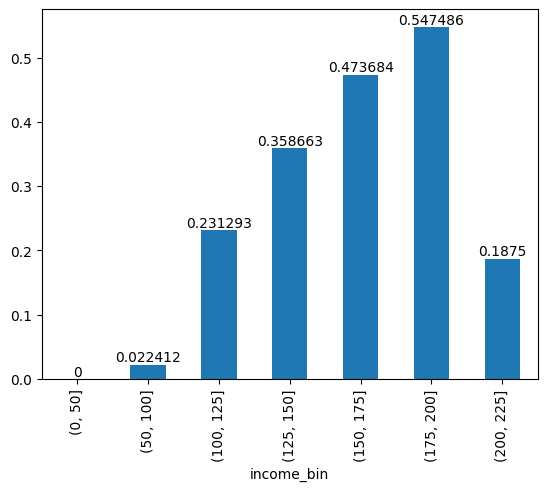

In [59]:
ax = bank.groupby('income_bin')['Personal Loan'].mean().plot.bar()
for container in ax.containers:
    ax.bar_label(container)

Above shows the breakdown of incomes in the dataset and the percent likelihood they are to accept a personal loan. The data shows that those with an income of over 100k has somewhat of a likelihood where anything below that is nearly impossible. Those who earn over 150k have about a 50% chance of getting the personal loan and the percent drops off after 200k likely because of lack of records in that range. I would also think that maybe those that earn under 100k don't think they'd be able to pay back the loan and those who make over 200k wouldn't need the loan as much which could result in the low percentages.

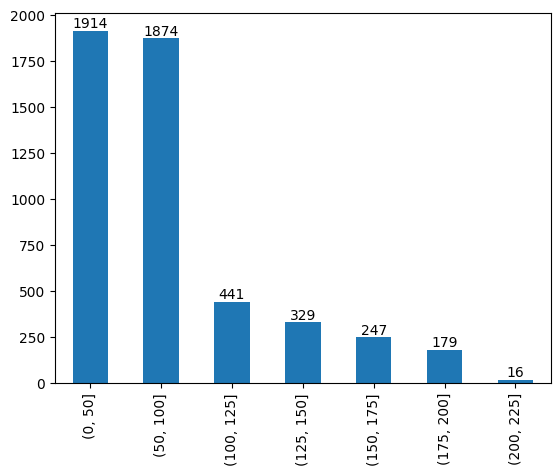

In [64]:
import matplotlib.pyplot as plt
ax = bank['income_bin'].value_counts().sort_index().plot.bar()
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge')

plt.show()


The chart above shows the total number of records in each bin and the data shows that the overwhelming majority (76%) was under 100k income. It also shows only 16 cases over 200k which explains the unexpected drop in personal loans accepted.